In [1]:
#Importing relevant libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline
sns.set()

----
###  Playing with all datasets

#### Loading dataset into dataframe objects

In [2]:
df_ae = pd.read_csv('data/ae_com.csv')
df_amz = pd.read_csv('data/amazon_com.csv')
df_temp = pd.read_csv('data/btemptd_com.csv')
df_klein = pd.read_csv('data/calvinklein_com.csv')
df_hanky = pd.read_csv('data/hankypanky_com.csv')
df_macys = pd.read_csv('data/macys_com.csv')
df_nord = pd.read_csv('data/shop_nordstrom_com.csv')
df_top = pd.read_csv('data/us_topshop_com.csv')
df_vic = pd.read_csv('data/victoriassecret_com.csv')

In [3]:
#Saving all dataframes into a list
df_list = [df_ae, df_amz, df_temp, df_klein, df_hanky, df_macys, df_nord, df_top, df_vic]

In [4]:
#Printing info for every df. We can observe that they all have the sames columns.
for i in df_list:
    print (i.retailer.unique(), '\n')
    print ('DataFrame Info : \n')
    print (i.info())
    print ('_________________________________________________________ \n')

['Ae US'] 

DataFrame Info : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28328 entries, 0 to 28327
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_name      28328 non-null  object 
 1   mrp               28328 non-null  object 
 2   price             28328 non-null  object 
 3   pdp_url           28328 non-null  object 
 4   brand_name        28328 non-null  object 
 5   product_category  28328 non-null  object 
 6   retailer          28328 non-null  object 
 7   description       28328 non-null  object 
 8   rating            21125 non-null  float64
 9   review_count      9590 non-null   float64
 10  style_attributes  28328 non-null  object 
 11  total_sizes       28328 non-null  object 
 12  available_size    28328 non-null  object 
 13  color             28328 non-null  object 
dtypes: float64(2), object(12)
memory usage: 3.0+ MB
None
__________________________________________________

In [5]:
#Checking some rows of the price column for every df

for i in df_list:
    print (i.retailer.unique(), '\n')
    print ('Price Heading - 10 first lines : \n')
    print (i.price.head(10), '\n')
    print ('Price Tail - 10 last lines lines : \n')
    print (i.price.tail(10), '\n')
    print ('_________________________________________________________ \n')

['Ae US'] 

Price Heading - 10 first lines : 

0    12.50 USD
1    12.50 USD
2    12.50 USD
3    12.50 USD
4    12.50 USD
5    12.50 USD
6    12.50 USD
7    12.50 USD
8    12.50 USD
9    12.50 USD
Name: price, dtype: object 

Price Tail - 10 last lines lines : 

28318    16.17 USD
28319    16.17 USD
28320    20.97 USD
28321    20.97 USD
28322    20.97 USD
28323    20.97 USD
28324    20.97 USD
28325    20.97 USD
28326    20.97 USD
28327    20.97 USD
Name: price, dtype: object 

_________________________________________________________ 

['Amazon US'] 

Price Heading - 10 first lines : 

0    $32.40 
1    $27.00 
2    $65.00 
3    $36.00 
4    $65.00 
5    $55.00 
6    $44.00 
7    $20.00 
8    $14.65 
9    $55.00 
Name: price, dtype: object 

Price Tail - 10 last lines lines : 

31602    $48.00 
31603    $38.00 
31604    $36.50 
31605    $48.00 
31606    $60.00 
31607    $65.00 
31608    $54.50 
31609    $60.00 
31610    $48.00 
31611    $43.06 
Name: price, dtype: object 

____________

In [6]:
#Apparently a product in df_hanky cost more than 615$!
df_hanky.iloc[5]

product_name               30 Pack Original Rise Thongs in Lucite Jar
mrp                                                             $615 
price                                                           $615 
pdp_url             http://www.hankypanky.com/thongs/30-pack-origi...
brand_name                                                 HankyPanky
product_category                                               Thongs
retailer                                                Hankypanky US
description         For the ultimate Hanky Panky collector! This l...
rating                                                            NaN
review_count                                                      NaN
style_attributes    ["One-size thong in our signature stretch lace...
total_sizes                                    ["Select", "One Size"]
available_size                                 ["Select", "One Size"]
color                                                         Rainbow
Name: 5, dtype: obje

In [7]:
df_hanky.description[5]

'For the ultimate Hanky Panky collector! This limited edition jar opens to 30 of your favorite original rise signature lace thongs. Perfect for gifting or treating yourself!'

In [8]:
#After looking at the description, it's looks like it's a limited collection with mutliple items.

In [9]:
#Using concat, because they all have the same columns, to merge all datasets into a df. 
#I prefer to merge all datasets now, and try to preprocess all in once.
#I still can call a specific dataset separatly.

df = pd.concat(df_list)

In [10]:
#Resetting index
df = df.reset_index(drop=True)

In [11]:
#Checking the head
df.head(3)

,product_name,mrp,price,pdp_url,brand_name,product_category,retailer,description,rating,review_count,style_attributes,total_sizes,available_size,color
0,Aerie Everyday Loves Lace Cheeky,12.50 USD,12.50 USD,https://www.ae.com/aerie-everyday-loves-lace-c...,AERIE,Cheekies,Ae US,Introducing Everyday Loves™: Made with love. E...,5.0,8.0,"[""Soft lace with the right amount of stretch"",...","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",Rugged Green
1,Aerie Everyday Loves Lace Cheeky,12.50 USD,12.50 USD,https://www.ae.com/aerie-everyday-loves-lace-c...,AERIE,Cheekies,Ae US,Introducing Everyday Loves™: Made with love. E...,5.0,8.0,"[""Soft lace with the right amount of stretch"",...","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",Natural Nude
2,Aerie Everyday Loves Lace Cheeky,12.50 USD,12.50 USD,https://www.ae.com/aerie-everyday-loves-lace-c...,AERIE,Cheekies,Ae US,Introducing Everyday Loves™: Made with love. E...,5.0,8.0,"[""Soft lace with the right amount of stretch"",...","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",True Black


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613143 entries, 0 to 613142
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   product_name      613143 non-null  object 
 1   mrp               613143 non-null  object 
 2   price             613143 non-null  object 
 3   pdp_url           613143 non-null  object 
 4   brand_name        613143 non-null  object 
 5   product_category  613143 non-null  object 
 6   retailer          613143 non-null  object 
 7   description       613143 non-null  object 
 8   rating            233556 non-null  float64
 9   review_count      222030 non-null  float64
 10  style_attributes  156675 non-null  object 
 11  total_sizes       613143 non-null  object 
 12  available_size    613143 non-null  object 
 13  color             612466 non-null  object 
dtypes: float64(2), object(12)
memory usage: 65.5+ MB


**<span style="color:blue">
    Question 1:
 Check if for the Rp prices, we have a specific type of products sold. </span>** 

In [13]:
rp_prices = df.loc[df.mrp.str.contains("Rp")][['product_name', 'mrp', 'product_category']]

In [14]:
#We have 4 products that contains Rp prices
rp_prices.product_name.value_counts()

Easy Push-Up Bra                                198
Cotton Lingerie NEW! String Bikini Panty         62
Dream Angels Demi Bra                            54
PINK NEW! Lace Lightly Lined Halter Bralette     36
Name: product_name, dtype: int64

**<span style="color:blue">Question 2:
Check for the factor to apply for currency converter to replace the prices by the USD equivalent. </span>**

*Consider that:* 
- 1 IRD (Roupie) = 0.000071 USD 
- 1 Costa Rica dollar = 0.0016 USD ₡

*Create a function that* 
- takes one argument to be one element from the price columns, 
- identifies which currency it is,
- extracts the value and converts it to float.

*Then apply your function to both price columns in df.*

**Price conversion function**

Trying to convert prices into all df directly (using the merged_df.) Encountered several problems, like price intervals. Founded a solution and decided to remplace the interval (like 14.55 - 18.22) by the mean of this interval.

In [15]:
#First defining a df_test with some cases encountered to build the function and test it in a safe way

df_test = pd.DataFrame({'price': ['USD 500.6', '500.7 USD', '$ 15', 
                                  '16.7 $', 'Rp 7653.6', 'rp 145', '₡ 89', '15.99 - 12.4', 
                                  '16.66 – 15.55']})
df_test

,price
0,USD 500.6
1,500.7 USD
2,$ 15
3,16.7 $
4,Rp 7653.6
5,rp 145
6,₡ 89
7,15.99 - 12.4
8,16.66 – 15.55


In [16]:
#Price conversion

def conv_price (value):
    
    """ 
    // Need to import pandas as pd, numpy as np //
    
    Use this function to clean prices values.
    Pass it in pd.DataFrame.apply or directly as f(val) on a specific value.
    
    This function: 
    -Convert Rp & ₡ values into USD (2017 conversion rate)
    -Clean "USD", "$" characters and strip unwanted residuals
    -Remplace price intervals (like '14.99 - 19.99') by the mean
    
    After passing this function into a pd.DataFrame, 
    the safest way is to apply pd.to_numeric to obtain a clean numerical column.
    
    """
    #Defining conversions rates
    rp_conv_rate = 0.000071
    cr_conv_rate = 0.0016
    
    #Cleaning the value, using lower and replace to ensure no difficulties like USD and usd
    value = str(value).lower().replace('usd','').replace('$','').strip()
    
    #Convert Rp prices
    if "rp" in value:
        value = value.replace('rp','').strip()
        value = pd.to_numeric(value)*rp_conv_rate
        return value
    
    #Convert Cr prices
    elif "₡" in value:
        value = value.replace('₡','').strip()
        value = pd.to_numeric(value)*cr_conv_rate
        return value
    
    #Convert intervals
    elif "-" or "–" in value:
        value = value.replace('-','').replace('–','').strip()
        value = [float(value[:5]), float(value[-5:])]
        value = np.mean(value)
        return value
    
    #Other cases
    else:
        return value

In [17]:
#Apply to df_test
df_test['price'] = df_test.price.apply(conv_price).apply(pd.to_numeric)
df_test, df_test.price.dtypes

(        price
 0  500.600000
 1  500.700000
 2   15.000000
 3   16.700000
 4    0.543406
 5    0.010295
 6    0.142400
 7   14.195000
 8   16.105000,
 dtype('float64'))

In [18]:
#It's look like the function did his job
#Apply to prices cols
df['price'] = df.price.apply(conv_price).apply(pd.to_numeric)
df['mrp'] = df.mrp.apply(conv_price).apply(pd.to_numeric)

In [19]:
df.dtypes

product_name         object
mrp                 float64
price               float64
pdp_url              object
brand_name           object
product_category     object
retailer             object
description          object
rating              float64
review_count        float64
style_attributes     object
total_sizes          object
available_size       object
color                object
dtype: object

In [20]:
#Having now floats for mrp & price cols, we can check desc stats
df.describe().round(2)

,mrp,price,rating,review_count
count,613143.00,613143.00,233556.00,2.220300e+05
mean,36.20,32.68,4.25,5.708913e+35
std,17.65,18.23,0.53,9.170288e+36
min,0.01,0.01,0.00,1.000000e+00
25%,24.50,19.99,4.00,1.600000e+01
50%,35.00,32.95,4.30,9.700000e+01
75%,46.50,44.50,4.50,3.860000e+02
max,615.00,615.00,5.00,1.560000e+38


<AxesSubplot:xlabel='mrp', ylabel='retailer'>

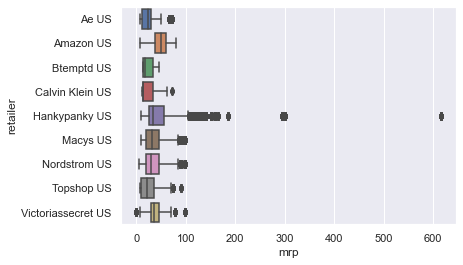

In [21]:
#Checking in a box plot to see the distribution. Most of the retailers have price that fall under 100$
#But we have some outliers for hanky panky, as we seen at the beginning.
sns.boxplot(data=df,x='mrp',y='retailer')

(0.0, 150.0)

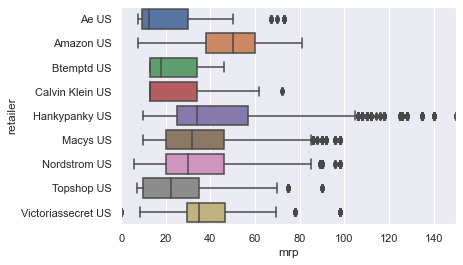

In [217]:
#We can set a x limit to have a better view on the distribution of mrp 
sns.boxplot(data=df,x='mrp',y='retailer')
plt.xlim(0,150)

(0.0, 150.0)

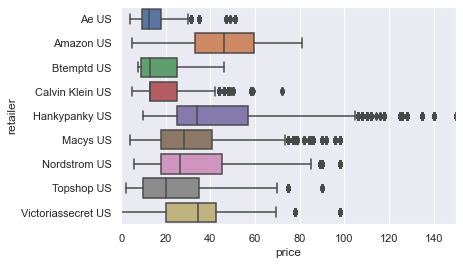

In [218]:
sns.boxplot(data=df,x='price',y='retailer')
plt.xlim(0,150)

##### Question 3: 
Which online retailers sell some Victoria's Secret products? 

In [22]:
#First checking brands names
df.brand_name.value_counts()

Victoria's Secret                                                                                      342533
Victoria's Secret Pink                                                                                 110853
HankyPanky                                                                                              35005
Wacoal                                                                                                  28978
AERIE                                                                                                   28304
Calvin Klein                                                                                            18892
Hanky Panky                                                                                              8133
Calvin-Klein                                                                                             7372
WACOAL                                                                                                   6580
b.tempt'd 

In [23]:
#Saving brands into a new df to try a preprocessing over brands names, because victoria appear multiple times
brands = pd.DataFrame(df['brand_name'].str.lower())

In [24]:
brands.loc[brands['brand_name'].str.contains('victoria'), 'brand_name'] = "Victoria Secret"
brands.value_counts()

brand_name                                                                                         
Victoria Secret                                                                                        453453
wacoal                                                                                                  35558
hankypanky                                                                                              35005
aerie                                                                                                   28304
calvin klein                                                                                            22034
hanky panky                                                                                             12715
calvin-klein                                                                                             7372
b.tempt'd by wacoal                                                                                      6153
b-temptd            

In [25]:
#Updating the brand_name col with the preprocessed one
df['brand_name'] = brands

In [26]:
#Now we can create a new variable that contains all rows with brand_name Victoria Secret using a query
victoria_products = df.query('(brand_name == "Victoria Secret")')

In [27]:
#Checking the differents retailers
victoria_products['retailer'].value_counts()

Victoriassecret US    453386
Amazon US                 67
Name: retailer, dtype: int64

Almost all Victoria Secrets products are from victoriasecret US retailer (453 386). 
There are some from Amazon US (only 67)

---
**Question 4:**
What are the Victoria's Secret products available in the different retailers?


In [28]:
#We have only one product sold by Amazon.
victoria_products.loc[victoria_products.retailer == 'Amazon US']['product_name'].value_counts()

Victoria's Secret The Ultimate Maximum Support Sport Bra    67
Name: product_name, dtype: int64

In [29]:
#And we have more than 600 products sold by Victoria Secret, including a lot of bra.
victoria_products.loc[victoria_products.retailer == 'Victoriassecret US']['product_name'].value_counts()

Body by Victoria Perfect Coverage Bra              17922
Victoria Sport Incredible by Victoria Sport Bra    12274
Dream Angels Push-Up Bra                           11878
Very Sexy Push-Up Bra                              10985
Body by Victoria Demi Bra                          10881
                                                   ...  
Cotton Lingerie Soft & Smooth Cheeky Panty             5
Very Sexy Embroidered Triangle Bra                     4
PINK Fresh & Clean Gym Kit                             3
PINK Coconut Waters Travel Kit                         3
Very Sexy Heart Lace Garter Belt                       2
Name: product_name, Length: 617, dtype: int64

--- 
**Question 5:**
How many distinct Victoria's Secret products do we have here? (check 'product_name')

In [30]:
distinct_victoria = len(victoria_products.product_name.value_counts())

print(f"We have {distinct_victoria} distinct Victoria's Secret products in this DataFrame.")

We have 618 distinct Victoria's Secret products in this DataFrame.


**Question 6:**
Try to merge amazon and VictoriaSecret datasets considering only Victorias-Secret products, using merge method from Pandas. 
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html?highlight=merge#pandas.DataFrame.merge

Compare prices.

In [31]:
#Since I have already merged all df into once, and since Victoria Secret products in Amazon & Victoria Secrets are
#in the variable "victoria_products", I simply reuse this variable to make the analysis

by_retailer = victoria_products.groupby('retailer')
#I use group by to compare price & mrp cols by retailer.
by_retailer[['price','mrp']].describe().round(2)

price                                                 \
                       count  mean    std    min    25%    50%    75%   max   
retailer                                                                      
Amazon US               67.0  40.4   5.74  29.99  36.76  39.99  39.99  55.0   
Victoriassecret US  453386.0  32.3  15.69   0.01  19.99  34.50  42.50  98.0   

                         mrp                                                 
                       count   mean   std    min    25%    50%    75%   max  
retailer                                                                     
Amazon US               67.0  40.78   6.1  29.99  36.76  39.99  41.37  55.0  
Victoriassecret US  453386.0  35.99  14.8   0.01  29.50  36.00  46.50  98.0

First, it is for me difficult to compare Amazon & Victoria Secret with relevance :
    - Amazon sell only 1 product, Victoria's Secret 617
    - We have only 67 elements for Amazon, and more than 453K for Victoria's Secret (more than 70% of the total df!)


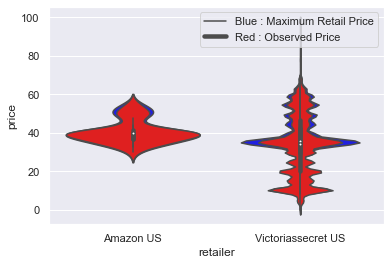

In [32]:
#I founded that a violin plot would be a good option to compare the prices, since we can observe different distribution
#very clearly, and we can compare mpr & prices and differents retailers all in one graph without losing clarity.
sns.violinplot(data=victoria_products,x='retailer',y='mrp',color='blue')
sns.violinplot(data=victoria_products,x='retailer',y='price',color='red')
plt.legend(labels=['Blue : Maximum Retail Price','Red : Observed Price'])

The distribution is much more condensed for Amazon. Most of the products fall in the interval '~25-45usd' (with the desc. stats observed before, we can say more about this : more than half of the products fall between 36.76usd and 39.99usd, and more than 3/4 fall between 30 and 40usd.

For Victoria Secrets, the price is much more spreaded. This is due to the much higher number of distincts products.
We still observe a peak close to the median (34.5usd). We can observe as well that around this peak, the price observed is much lower than the max retail price (in comparaison of the other price ranges, and amazon).
We observe also a lot of peaks in the victoria's price distribution, this is not a smooth distribution everywhere.
This could be the different products, that fall into certain price ranges.

Finally, for Victoria's Secrets price distribution, we can observe that for the lowest prices (like every price lower than the median), the observed price is almost equal to the maximum retail price. But for higher prices, we observe a higher "discount", or simply difference between the mrp and the observed price. It could be a story of gross margin, probably lower for low-priced products, so the retailer does not apply significant reductions.

**Question 7:**
Explore which brands ('brand_name') are sold by each retailer 

In [34]:
#Again, a brand cleaning would really help to compare brands sold by different retailers.
#After a google research we see that b.temptd is in fact part of wacoal
#https://www.google.com/search?sxsrf=ALeKk02qnczZK9esa6gag_zmM0MVMJbEfg%3A1610555872728&ei=4CH_X7-ALPLBlwSb6LGwDQ&q=b+tempt%27d+brand&oq=b+tempt%27d+brand&gs_lcp=CgZwc3ktYWIQAzIGCAAQFhAeOgQIIxAnOgUIABDLAToCCAA6BAgAEBM6CAgAEBYQHhATOgoIABANEAUQHhATOgoIABAIEA0QHhATUOZYWOVdYNVeaABwAHgAgAFTiAHdA5IBATeYAQCgAQGqAQdnd3Mtd2l6wAEB&sclient=psy-ab&ved=0ahUKEwi_8LyVrJnuAhXy4IUKHRt0DNYQ4dUDCA0&uact=5


allbrands = pd.DataFrame(df['brand_name'].str.lower())
allbrands.loc[allbrands['brand_name'].str.contains('calvin'), 'brand_name'] = "Calvin Klein"
allbrands.loc[allbrands['brand_name'].str.contains('temp'), 'brand_name'] = "wacoal"
allbrands.loc[allbrands['brand_name'].str.contains('hanky'), 'brand_name'] = "Hanky Panky"
allbrands.loc[allbrands['brand_name'].str.contains('aeo'), 'brand_name'] = "aerie"
allbrands.value_counts()

brand_name                                                                                  
victoria secret                                                                                 453453
Hanky Panky                                                                                      48302
wacoal                                                                                           45271
Calvin Klein                                                                                     31251
aerie                                                                                            28328
us topshop                                                                                        3082
vanity fair                                                                                       2575
nordstrom lingerie                                                                                 870
s                                                                                  

In [35]:
#Updating again the brand_name col with the preprocessed one
df['brand_name'] = allbrands

#And finally, dropping unsignificants brands (brands that are irrelevant, errors or that have only 1 to 3 occurences)
brands_to_drop = ['nintendo','compression-comfort', 'creative-motion', 'fila', 'lucky-brand', 'sexy-hair','ref=w_bl_sl_l_b_ap_web_2603426011?ie=utf8&node=2603426011&field-lbr_brands_browse-bin=wacoal', 's']
df = df[~df['brand_name'].isin(brands_to_drop)]

#We finally have 8 brands, much easier and relevant to use
df.brand_name.value_counts()

victoria secret       453453
Hanky Panky            48302
wacoal                 45271
Calvin Klein           31251
aerie                  28328
us topshop              3082
vanity fair             2575
nordstrom lingerie       870
Name: brand_name, dtype: int64

In [36]:
#To explore brands sold by retailers, we can create a new df with the results of the value_counts method.

brands_by_retailers = pd.DataFrame(df[['retailer', 'brand_name']].value_counts())
brands_by_retailers = brands_by_retailers.reset_index()
brands_by_retailers.columns = ['retailer', 'brand','count']

#Finally sorting values for more readability
brands_by_retailers.sort_values(by='retailer')

,retailer,brand,count
2,Ae US,aerie,28328
17,Amazon US,victoria secret,67
3,Amazon US,wacoal,23579
16,Amazon US,Hanky Panky,582
7,Amazon US,Calvin Klein,7373
11,Btemptd US,wacoal,3518
8,Calvin Klein US,Calvin Klein,4747
1,Hankypanky US,Hanky Panky,35005
5,Macys US,wacoal,14200
4,Macys US,Calvin Klein,15989


In [37]:
#We can check descriptive statistics for categorical cols as well.
brands_by_retailers.describe(include='all').round(2)

,retailer,brand,count
count,18,18,18.00
unique,9,8,NaN
top,Nordstrom US,Calvin Klein,NaN
freq,4,4,NaN
mean,NaN,NaN,34062.89
std,NaN,NaN,105142.54
min,NaN,NaN,67.00
25%,NaN,NaN,3097.00
50%,NaN,NaN,4664.50
75%,NaN,NaN,15541.75


In [ ]:
#We quickly observe that we have 9 different retailers and 8 brands. Nordstrom US sell 4 brands.
#Calvin Klein is the brand sold by the highest number of retailers (4).
#But this is also the case for Amazon, Macys and for Hanky Panky, Wacoal.

<AxesSubplot:xlabel='brand', ylabel='retailer'>

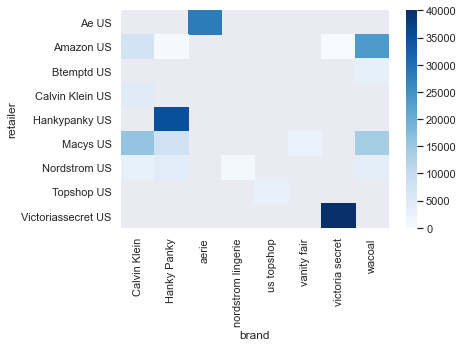

In [38]:
#We can set a heatmap to have a better idea of the brands sold by retailers.

brands_by_retailers_pivot = brands_by_retailers.pivot('retailer', 'brand','count')

#I have to set a maximum value because of the size of Victoria's Secret dataframe, which is much, much higher
#than the others, so we lose a lot of readability without a vmax.
sns.heatmap(data=brands_by_retailers_pivot, cmap='Blues', vmin=0, vmax=40000)

Several observations can be made from this graph. 
First, Ae US, Hanky Panky US, Topshop US, Btemptd US, Calvin Klein and Victoria's Secret US are exclusive. Those retailers sell only their brand. So we have 6/9 retailers that are exclusive, and 3 that sell multiple brands.

Amazon sell 4 brands, but mostly wacoal (more than 2/3 of the total) and Calvin Klein (1/3 of the total)

So we have :
    - 6 retailers who are an exclusive e-boutique of the brand in question.
    - 1 retailer (Nordstrom US) that sell multiple products, including its ownbrand
    - 2 retailers who are not a underwear manufacturers but a e-boutique, with mutliple brands


**Question 8:**
As we do not have so much Victoria's Secret products in the different files.

Explore the different files and the content for Calvin Klein products. 

Which retailers provide Calvin Klein products?


<AxesSubplot:xlabel='brand', ylabel='retailer'>

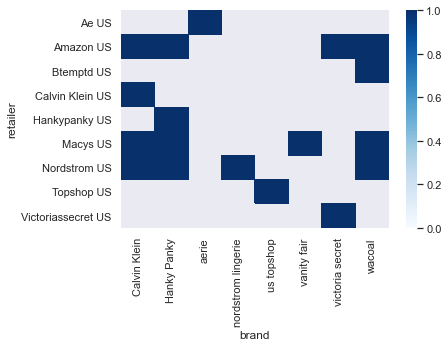

In [39]:
#We can reuse the heatmap, with a vmax of 1 to observe "Which retailer have at least one calvin klein product"
sns.heatmap(data=brands_by_retailers_pivot, cmap='Blues', vmin=0, vmax =1)

In [ ]:
#So Calvin Klein is sold by Amazon, Calvin Klein US, Macys US and Nordstrom US.

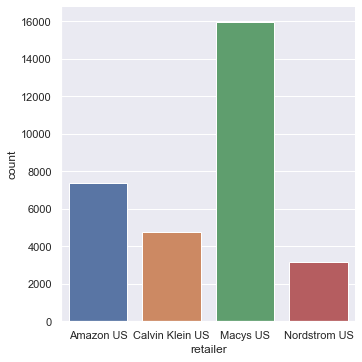

In [40]:
#Going further, we can reuse the pivot df made for the heatmap
retailers_ck = brands_by_retailers_pivot['Calvin Klein']

#Droping na, i.e. retailers who do not sell Calvin Klein products
retailers_ck.dropna(inplace=True)
retailers_ck = retailers_ck.reset_index()
retailers_ck.columns = ['retailer','count']

#And finally draw a categorical plot to compare retailers for Calvin Klein products.
sns.catplot(data=retailers_ck, x='retailer',y='count',kind='bar')

In [229]:
#Macys US sell much more Calvin Klein products that the others retailers (and more than Calvin Klein US itself!)
sum_ck = int(retailers_ck['count'].sum())
print(f'We have {sum_ck} Calvin Klein elements.')

We have 31251 Calvin Klein elements.


----
**Question 9: Extraction and cleaning of Calvin Klein products data** 

Extract all data from each file for the Calvin Klein products. Check for the brand_name. It could be written in multiple ways. 

Put each in new dataframes. 

To do so: 
- Consider dataframes containing Clavin Klein products and preprocess each dataframe separately (it might be useful to adjust your preprocessing function when content is different)
- Identify and extract Calvin Klein product data

In [41]:
#Again, since I've already merged all df and preprocessed brand_name, 
#I will create a new variable with only rows that have a brand_name equal to Calvin Klein.
df_ck = df.query('brand_name == "Calvin Klein"')
df_ck.head(3)

,product_name,mrp,price,pdp_url,brand_name,product_category,retailer,description,rating,review_count,style_attributes,total_sizes,available_size,color
28328,Calvin Klein Women's Sheer Marquisette Demi Un...,36.0,32.4,https://www.amazon.com/-/dp/B01NAVD98J?th=1&psc=1,Calvin Klein,Bras,Amazon US,"An unlined demi cup bra featuring sheer, sexy ...",4.5,47.0,"[ 72% Nylon, 28% Elastane , Imported , hook an...","30B , 30C , 30D , 30DD , 32A , 32B , 32C , 32D...","30B , 30C , 30D , 30DD , 32B , 32C , 32D , 32D...",Bare
28334,Calvin Klein Women's Seductive Comfort Tailore...,44.0,44.0,https://www.amazon.com/-/dp/B00GB81G3A?th=1&psc=1,Calvin Klein,Bras,Amazon US,Calvin Klein Black is an updated version of CK...,4.2,409.0,"[ 76% Nylon/24% Elastane , Imported , hook and...","30C , 30D , 30DD , 32A , 32B , 32C , 32D , 32D...","32D , 32DD , 34DD , 36D , 36DD , 36DDD",Black Coffee
28335,Calvin Klein Women's Modern Cotton Bikini,20.0,20.0,https://www.amazon.com/-/dp/B06XSMGG76?th=1&psc=1,Calvin Klein,Panties,Amazon US,Soft jersey Calvin Klein Underwear briefs with...,4.7,507.0,"[ Cute and comfortable everyday bikini , Embos...","X-Small , Small , Medium , Large , X-Large","Small , Medium , Large",Salt Lake


In [42]:
df_ck.describe().round(2)

,mrp,price,rating,review_count
count,31251.00,31251.00,18126.00,18131.00
mean,30.24,27.31,4.34,87.96
std,15.43,14.68,0.50,152.99
min,7.51,4.99,0.00,1.00
25%,13.00,13.00,4.00,4.00
50%,28.00,24.00,4.40,16.00
75%,39.00,37.80,4.70,69.00
max,98.00,98.00,5.00,532.00


<AxesSubplot:xlabel='price', ylabel='retailer'>

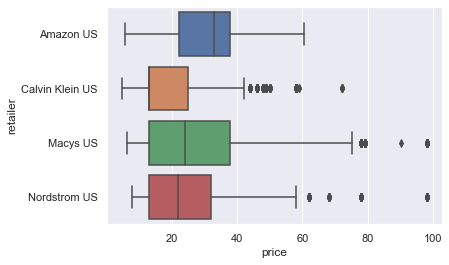

In [43]:
sns.boxplot(data=df_ck,x='price',y='retailer')

In [ ]:
#Interesting to see that price quartiles start at the same position for Calvin Klein, Macys & Nordstrom but not for Amazon
#Amazon prices are higher, especially the median price
#Price is very condensed in Calvin Klein US, with a few outliers
#Price is much more spreaded in Macys US, we some outliers as well

In [230]:
#It could be maybe interesting to analyse the difference between mrp & prices across the retailers.
#So we can create a new column, "price_difference".
#Every value is the price difference in proportion.
df_ck['price_difference'] = (df_ck.mrp - df_ck.price) / df_ck.price

<AxesSubplot:xlabel='price_difference', ylabel='retailer'>

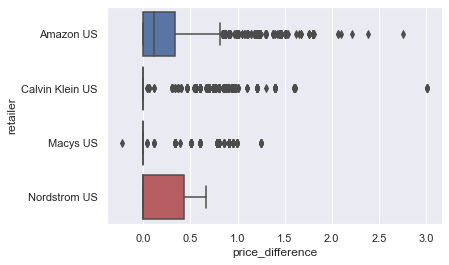

In [45]:
sns.boxplot(data=df_ck,x='price_difference',y='retailer')

We observe that excpet for a very few products, the observed price is almost exactly the same than the maximum retail price for Calvin Klein US and Macys US. But for Amazon and Nordstrom, the difference goes from 0 to 50% most of the time.

There is 1 product that does not respect the mrp in Macys US (because the value is negative, so the price is higher than the mrp. It could be also an error in the original data or during data collection.


In [231]:
#Checking negative price difference
df_ck.loc[(df_ck['price_difference'] < 0)]

,product_name,mrp,price,pdp_url,brand_name,product_category,retailer,description,rating,review_count,style_attributes,total_sizes,available_size,color,price_difference
120920,CK Black Collection Temptation Silk Romper QS5495,70.0,90.0,http://www1.macys.com/shop/product/calvin-klei...,Calvin Klein,Women - Lingerie & Shapewear - Designer Lingerie,Macys US,Stylish meets sensual in this silk and mesh ro...,NaN,NaN,"[""Boat neck"", ""Sheer mesh side panels"", ""Silk ...","[""S"", ""M"", ""L""]","[""S"", ""M"", ""L""]",Black,-0.222222


In [46]:
#Groupby retailer
df_ck_retailer = df_ck.groupby('retailer')

In [47]:
#Checking desc stats for different retailers
df_ck_retailer.price_difference.describe()

,count,mean,std,min,25%,50%,75%,max
retailer,,,,,,,,
Amazon US,7373.0,0.185238,0.287151,0.000000,0.0,0.109244,0.333333,2.754789
Calvin Klein US,4747.0,0.148018,0.345211,0.000000,0.0,0.000000,0.000000,3.008016
Macys US,15989.0,0.117783,0.289831,-0.222222,0.0,0.000000,0.000000,1.251126
Nordstrom US,3142.0,0.161092,0.244455,0.000000,0.0,0.000000,0.428571,0.669449


In [ ]:
#As we observed in the boxplot, Macys US and Calvin Klein does not apply any "discount" more than 75% of the time.
#We observe that the mean is not relevant to compare price difference : for exemple, it is 15% for Calvin Klein US
#But more than 75% of the time, CK does not apply any discount.

**Question 10:**

Consider your Calvin Klein dataFrame. 

Extract the description of every product, only keep the unique description, and count which words appear the most. 

In [49]:
#First, I will extract the unique description and saving into a list for further processing.
ck_desc = list(df_ck['description'].unique())
words_df = pd.DataFrame()

#Looping over this list and saving each word, excluding punctuation, into a new df
for e in ck_desc:
    words = str(e).strip('.').strip(',').split(sep=' ')
    words_df = words_df.append(words)

#Finally we have a df were each row is a word (non-unique)  
words_df.columns = ['words']
words_df.describe()

,words
count,8808
unique,1311
top,a
freq,403


In [ ]:
#There are 8808 words, 1311 uniques.

In [50]:
#We can create a new df with the value_counts results for each word.
words_df = pd.DataFrame(words_df.words.str.lower().value_counts()).reset_index()
words_df.columns = ['word', 'count']
words_df.head(10)

,word,count
0,a,469
1,and,348
2,the,263
3,calvin,246
4,with,206
5,klein,206
6,this,202
7,logo,170
8,from,161
9,in,143


In [51]:
#Dropping unrelevant words for the analysis, because they are very frequent but does not have very useful info.

words_to_drop = ['and','this','the','with','from','a','in','to',
                 'is','by','of','for','at','that','your','you','an']

words_df = words_df[~words_df['word'].isin(words_to_drop)].reset_index(drop=True)
words_df.head(3)

,word,count
0,calvin,246
1,klein,206
2,logo,170


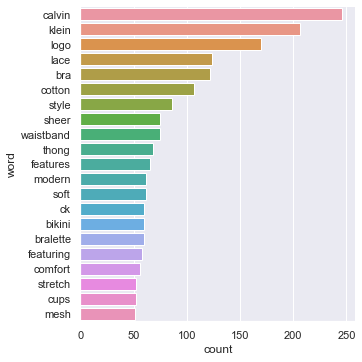

In [52]:
#We can plot the 20 most frequent words in a catplot.

word_graph = words_df.loc[0:20]
sns.catplot(data=word_graph, x='count',y='word', kind='bar')

In [ ]:
#Without much surprise, calvin and klein are the most fequent word.
#Then, "logo" appear. I would rudely conclude that this is for every product that have a visible CK logo.
#Then we observe some words that describe the category ('bra', 'thong' ...)
#And some that describe the materials/composition ('coton'...)

In [53]:
#I found a library on the web that can draw an image with our results, we will try it
from os import path
from wordcloud import WordCloud
words_dict = {}
words_dict = {i:e for i,e in zip(words_df['word'],words_df['count'])}

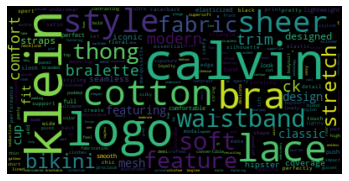

In [54]:
#To be honest, I haven't fully taken the time to understand how this code works (just enough to adapt it).

wordcloud = WordCloud(max_font_size=60, collocations=False).generate(" ".join([(k + ' ') * v for k,v in words_dict.items()]))

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

**Question 11:**

Consider all dataframes (you might concat them all into one after having processed them separately).

- which categories of products are sold most?
- which products are sold most?
- which products have the highest ratings?
- what are the top sellers (sold most and best ratings)?
- what is the top product color (sold most and best ratings)?

#### 11.a ) which categories of products are sold most?

In [55]:
df['product_category'].value_counts()

Demi Bra                            39865
Push-Up Bra                         36452
Bras                                31129
Perfect Coverage Bra                24762
Incredible by Victoria Sport Bra    19437
                                    ...  
XO Lace Bodysuit                        5
Embroidered Triangle Bra                4
Fresh & Clean Gym Kit                   3
Coconut Waters Travel Kit               3
Heart Lace Garter Belt                  2
Name: product_category, Length: 525, dtype: int64

In [56]:
#525 categories ! For me, this is impossible to do something relevant with this.

#First saving product categories into another variable to do some test on

categories = pd.DataFrame(df['product_category'].str.lower())

#We first see that "bra" appear multiple times in various forms, so we will start here
categories.loc[categories.product_category.str.contains("bra|push"), 'product_category'] = "bra"
categories.value_counts()

product_category                                
bra                                                 413463
women - lingerie & shapewear - designer lingerie     18893
collections                                          16768
panties                                              13008
women - lingerie & shapewear - panties               10592
                                                     ...  
mesh & lace cheeky panty                                 5
xo lace bodysuit                                         5
coconut waters travel kit                                3
fresh & clean gym kit                                    3
heart lace garter belt                                   2
Length: 341, dtype: int64

In [57]:
#After some google research on the lingerie lexical and in our categories, we can try this

#Panties
categories.loc[categories.product_category.str.contains("panty|pantie|panties|thong|cheekster|boyshort|cheekies|hipster"), 'product_category'] = "panties"

#Bikini
categories.loc[categories.product_category.str.contains("bikini|one piece|one-piece|triangle"), 'product_category'] = "bikini"

#Slip
categories.loc[categories.product_category.str.contains("slip"), 'product_category'] = "slip"

#Sport
categories.loc[categories.product_category.str.contains("strappy|sport|gym"), 'product_category'] = "sport underwear"

#Lingerie
categories.loc[categories.product_category.str.contains("lingerie"), 'product_category'] = "lingerie"

#Boybriefs
categories.loc[categories.product_category.str.contains("boy"), 'product_category'] = "boybriefs"

categories.value_counts()

product_category         
bra                          413463
panties                      108239
lingerie                      31389
collections                   16768
bikini                         8122
                              ...  
fishnet lace dress                6
xo lace bodysuit                  5
super softmuscle tank             5
coconut waters travel kit         3
heart lace garter belt            2
Length: 146, dtype: int64

In [58]:
#Research again
df_cat = categories['product_category'].value_counts()
df_cat = pd.DataFrame(df_cat)
df_cat = df_cat.reset_index()
df_cat.columns = ['category', 'count']
df_cat.loc[10:20]

,category,count
10,racerback,1186
11,medallion lace teddy,884
12,classic,706
13,sport underwear,679
14,deep v crop,622
15,lace cross-front unlined halter,620
16,longline,609
17,the floral lace sexy shortie,599
18,satin & lace babydoll,511
19,raw cut high-waist brief,496


In [59]:
#Undies
categories.loc[categories.product_category.str.contains("undies|undy|undie"), 'product_category'] = "undies"

#Top
categories.loc[categories.product_category.str.contains("tank|longline|top|deep v crop|unlined demi"), 'product_category'] = "top"

#Sleep Underwear
categories.loc[categories.product_category.str.contains("sleepwear|sleep|kimono"), 'product_category'] = "sleep underwear"

#Shorties
categories.loc[categories.product_category.str.contains("shortie|shorties|short|racerback|raw cut|slip|lace"), 'product_category'] = "shorties"

categories.value_counts()

product_category         
bra                          413463
panties                      108239
lingerie                      31389
collections                   16768
shorties                      14754
                              ...  
glass water bottle                9
washed canvas tote                9
bridal robe                       7
metal water bottle                6
coconut waters travel kit         3
Length: 65, dtype: int64

In [60]:
#We still have 65 categories and I don't know how to reduce significantly this number.
#I am trying to see if I can drop some underepresented categories.

df_cat = categories['product_category'].value_counts()
df_cat = pd.DataFrame(df_cat)
df_cat = df_cat.reset_index()
df_cat.columns = ['category', 'count']

top_cats = sum(df_cat['count'][:15])
oth_cats = sum(df_cat['count'][15:])
print (round(((oth_cats/(oth_cats+top_cats))*100),2))

0.85


In [ ]:
#So, the 15 most represented categories represent 99.15% of the total
#And all the other (50 categories) only 0.85%.

In [61]:
#Defining a limit, equal to 0.1% of the values (about 600)

lim = (np.sum(df_cat['count']))/1000
lim = int(lim)

df_lim = df_cat.loc[(df_cat['count'] > lim)]

kc = np.sum(df_lim['count'])
kp = (kc/1000) / lim
print(f"The limit defined allow us to drop {round((1-kp)*100,2)}% of the values.")

The limit defined allow us to drop 1.04% of the values.


In [62]:
#Saving all the categories to drop (because they represent less than 0.1% of the total) into a list

df = df.reset_index(drop=True)
categories = categories.reset_index(drop=True)
cat_to_drop = list(df_cat.loc[df_cat['count'] < lim].category)

In [63]:
df['product_category'] = categories['product_category']
df.product_category.value_counts()

bra                          413463
panties                      108239
lingerie                      31389
collections                   16768
shorties                      14754
                              ...  
glass water bottle                9
washed canvas tote                9
bridal robe                       7
metal water bottle                6
coconut waters travel kit         3
Name: product_category, Length: 65, dtype: int64

In [64]:
#Dropping all those categories. Again, I am using the not operator instead of drop and updating my df variable
#with this, because it allow me to avoid reloading all the notebook if I want to go back and undo this action.
df = df[~df['product_category'].isin(cat_to_drop)]

In [65]:
df.product_category.value_counts()

bra                413463
panties            108239
lingerie            31389
collections         16768
shorties            14754
bikini               8122
boybriefs            4826
undies               4032
top                  2804
sleep underwear       827
classic               706
sport underwear       679
Name: product_category, dtype: int64

<AxesSubplot:xlabel='count', ylabel='product_category'>

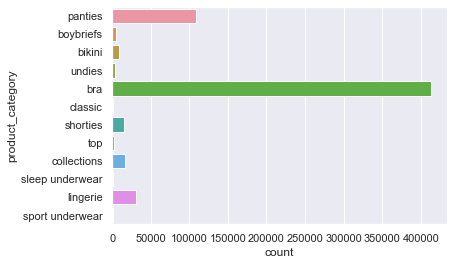

In [66]:
#I assume that this is probably not the best cleaning, because bra is much overrepresented, in comparaison to the others
#categories. But one reason is again the size of Victoria Secrets dataframe compared to the other retailers.
sns.countplot(data=df,y='product_category')

So, bra and panties are the most sold categories, by far.

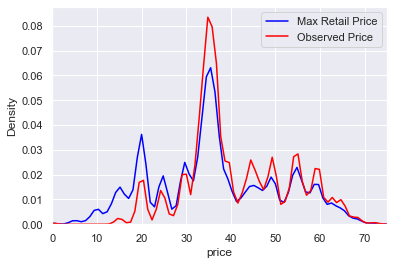

In [67]:
#We can draw a distplot for the bra category and observe the result.
sns.kdeplot(data=df.loc[df['product_category']=='bra']['price'],color='blue')
sns.kdeplot(data=df.loc[df['product_category']=='bra']['mrp'],color='red')
plt.xlim(0,75)
plt.legend(labels=['Max Retail Price','Observed Price'])

(0.0, 100.0)

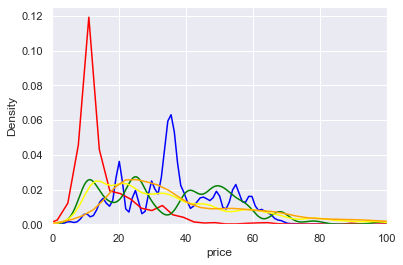

In [68]:
sns.kdeplot(data=df.loc[df['product_category']=='bra']['price'],color='blue')
sns.kdeplot(data=df.loc[df['product_category']=='panties']['price'],color='red')
sns.kdeplot(data=df.loc[df['product_category']=='shorties']['price'],color='green')
sns.kdeplot(data=df.loc[df['product_category']=='lingerie']['price'],color='yellow')
sns.kdeplot(data=df.loc[df['product_category']=='collections']['price'],color='orange')
plt.xlim(0,100)

(0.0, 100.0)

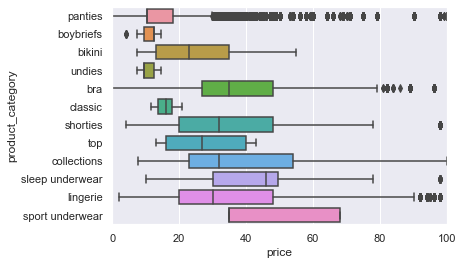

In [70]:
sns.boxplot(data=df,x='price',y='product_category')
plt.xlim(0,100)

Some osbervations about the different prices distribution across categories :
    - Panties, Boybriefs, Unides and Classic are very cheap and the distribution is very condensed. There are some expensive panties, but it look like boybriefs, undies and classic are always less than 15-20usd.
    Most of the other products, except sport underwear, have price that are most of the time between 20 and 50 usd.
    -Sport underwear is much more expensive than the rest of the categories.

<AxesSubplot:xlabel='brand', ylabel='product_category'>

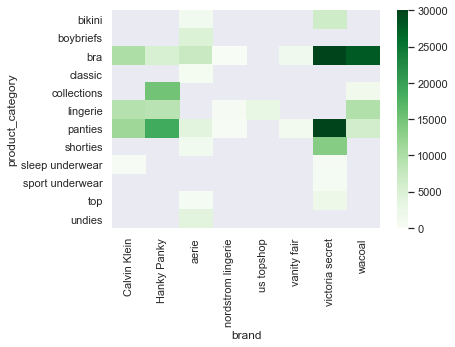

In [71]:
#Same process as did before, we can save value_counts result into a new pd df and observe the result on a heatmap
cat_by_brands = pd.DataFrame(df[['product_category', 'brand_name']].value_counts())
cat_by_brands = cat_by_brands.reset_index()
cat_by_brands.columns = ['product_category', 'brand','count']
cat_by_brands.sort_values(by='brand')

cat_pivot = cat_by_brands.pivot('product_category','brand','count')
#Again, we have to set a vmax becausse bra is overrepresented in Victoria's Secret and create a huge lack of readability
sns.heatmap(data=cat_pivot ,cmap='Greens',vmin=0,vmax=30000)

**11.b) Which products are sold most?**

In [72]:
df.product_name.value_counts()

Body by Victoria Perfect Coverage Bra                     17922
Victoria Sport Incredible by Victoria Sport Bra           12274
Dream Angels Push-Up Bra                                  11878
Very Sexy Push-Up Bra                                     10985
Body by Victoria Demi Bra                                 10881
                                                          ...  
Black Velvet Bralet by Y.A.S                                  1
Firm Control Visual Effects Minimizing Camisole 803210        1
Strappy Mesh Bralet                                           1
'BARE - Eve' Natural Rise Thong                               1
Contrast Strappy Thong                                        1
Name: product_name, Length: 2783, dtype: int64

**11.c) Which products have the highest ratings?**

In [73]:
#First let compute the highest rating and how many notes & products fall into this

#Finding the max rating
max_rating = df['rating'].max()

#Count non-rateds rows
nan_rating = df['rating'].isnull().sum()

#How many rows have the max rate
nb_max_rating = len(df.loc[df.rating == max_rating])

#How many rows have a rate
nb_rated = len(df) - nan_rating

#How many rows have the max rate, in proportion of the number of rates
prop_max_rating = round((nb_max_rating / nb_rated)*100,2)

#Total uniques products into the df
unique_products = np.count_nonzero(df['product_name'].unique())

#Total uniques products that have the max rate
nb_max_rated_products = np.count_nonzero(df[df.rating == max_rating]['product_name'].unique())

#Unique products with the max rate in proportion to the total number of unique products
prop_products = round((nb_max_rated_products / unique_products)*100,2)

#Printing the result
print(f"Over the {nb_rated} rates, {nb_max_rating} have the max rating ({int(max_rating)}/5), or {prop_max_rating}% of the total")
print(f"Over the {unique_products} distinct products, {nb_max_rated_products} have the max rating ({int(max_rating)}/5), or {prop_products}% of the total")

Over the 229340 rates, 19770 have the max rating (5/5), or8.62% of the total
Over the 2783 distinct products, 275 have the max rating (5/5), or 9.88% of the total


In [74]:
#What are those products?
df.loc[df.rating == max_rating]['product_name'].value_counts()

Aerie Cheeky                                   891
Signature Lace Original Rise Thong             781
Aerie Everyday Loves Lace Cheeky               493
Aerie Boybrief                                 488
Signature Lace *Petite Size* Low Rise Thong    469
                                              ... 
Seamless Hipster Briefs                          2
Underwired Lace Bra                              2
No VPL Thong                                     2
'Topshop' Logo Seamless Bra                      1
Criss Cross Lace Mini Knickers                   1
Name: product_name, Length: 275, dtype: int64

<AxesSubplot:xlabel='count', ylabel='product_name'>

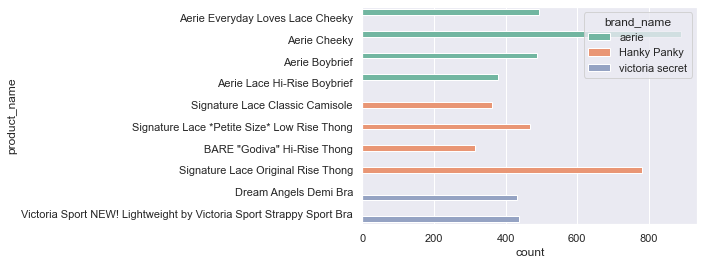

In [237]:
#Let now plot the 10 largest values and the brand of those products

#First saving value_counts into a variable
maxrated_products = df.loc[df.rating == max_rating]['product_name'].value_counts()

#Ensure we count only max_rated products
df_maxrt = df.loc[df.rating == max_rating]

#Then extracting a dataframe with only the products that are 10 largest in value counts
df_tenlargest_products = df_maxrt[df_maxrt.product_name.isin(maxrated_products.nlargest(10).index)]

#Finally plot the result and adding the brand
sns.countplot(data=df_tenlargest_products,y='product_name',hue='brand_name',palette='Set2')

In [76]:
#Founded another way to plot more simply with pandas
#df[df.product_name.isin(maxrated_products.nlargest(10).index)]['product_name'].value_counts().plot(kind="bar")

<AxesSubplot:xlabel='count', ylabel='product_category'>

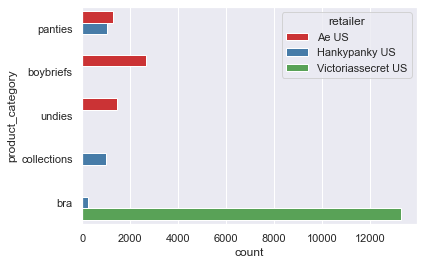

In [77]:
#A bit more information about those products : category & retailers
sns.countplot(data=df_maxrt_prods,y='product_category',hue='retailer',palette='Set1')

**11.d) What are the top sellers (sold most and best ratings)?**


<AxesSubplot:xlabel='retailer'>

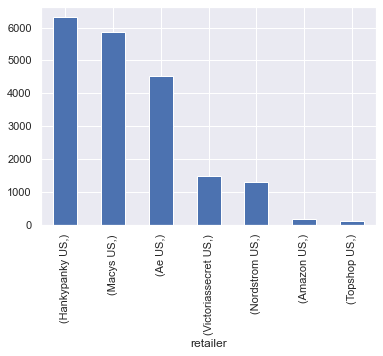

In [78]:
#Top retailers
df.loc[df.rating == max_rating][['retailer']].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='brand_name'>

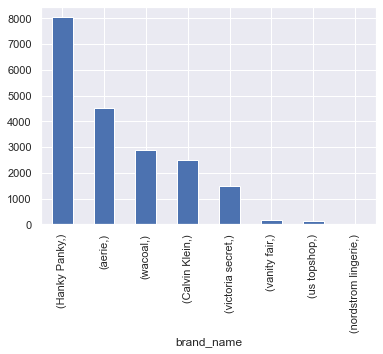

In [232]:
#And top brands
df.loc[df.rating == max_rating][['brand_name']].value_counts().plot(kind='bar')

In [80]:
df.loc[df.rating == max_rating][['retailer', 'brand_name']].value_counts()

retailer            brand_name        
Hankypanky US       Hanky Panky           6308
Ae US               aerie                 4523
Macys US            wacoal                2423
                    Calvin Klein          2135
Victoriassecret US  victoria secret       1482
Macys US            Hanky Panky           1123
Nordstrom US        Hanky Panky            612
                    wacoal                 483
                    Calvin Klein           210
Macys US            vanity fair            191
Amazon US           Calvin Klein           157
Topshop US          us topshop             121
Nordstrom US        nordstrom lingerie       2
dtype: int64

**11.e) What is the top product color (sold most and best ratings)?**

In [81]:
#Black is the top product color
df.loc[df.rating == max_rating][['color']].value_counts()

color                
Black                    2044
White                    1107
Chai                      709
Navy                      638
True Black                601
                         ... 
TBC                         2
LILAC                       1
Light Aglow                 1
Lilac Sachet                1
Tango Red/Coral Blush       1
Length: 389, dtype: int64

**Question 12:**

Consider all dataframes (you might concat them all into one after having processed them separately).

- how can you assess an overall rating for a brand based on the ratings of its products?
- according to your definition, which brands have the best ratings?
- which types of products sold by all brands? (you might have to process the product category strings) and which product of these categories are sold by all brands?
- among these products, which brands has the best ratings?

**12.a) How can you assess an overall rating for a brand based on the ratings of its products?**

In [82]:
#First checking desc stats for the rating column
df.rating.describe()

count    229340.000000
mean          4.258477
std           0.522665
min           0.000000
25%           4.000000
50%           4.300000
75%           4.500000
max           5.000000
Name: rating, dtype: float64

In [94]:
#we can see how many n.a. values we have for every df (equal to every retailer)
for i in df_list :
    print(i.retailer.unique(),int(((i.rating.isnull().sum()/len(i))*100)),'%')

['Ae US'] 25 %
['Amazon US'] 0 %
['Btemptd US'] 100 %
['Calvin Klein US'] 100 %
['Hankypanky US'] 74 %
['Macys US'] 36 %
['Nordstrom US'] 37 %
['Topshop US'] 91 %
['Victoriassecret US'] 69 %


In [ ]:
#A lot of rates are missing, including 100%  for Calvin Klein, and 91% for Topshop.

In [150]:
#First, we can try to observe somes stats of the rating by brand
df.groupby('brand_name').rating.describe().round(2)

,count,mean,std,min,25%,50%,75%,max
brand_name,,,,,,,,
Calvin Klein,18126.0,4.34,0.50,0.0,4.0,4.4,4.7,5.0
Hanky Panky,16100.0,4.74,0.43,0.0,4.6,4.9,5.0,5.0
aerie,17671.0,4.33,0.72,1.0,4.0,4.5,5.0,5.0
nordstrom lingerie,853.0,3.54,0.48,2.7,3.3,3.5,4.0,5.0
us topshop,266.0,4.25,1.01,1.0,4.0,4.7,5.0,5.0
vanity fair,2437.0,4.49,0.38,0.0,4.4,4.5,4.8,5.0
victoria secret,137050.0,4.17,0.49,0.0,4.0,4.3,4.5,5.0
wacoal,36837.0,4.32,0.43,0.0,4.2,4.3,4.4,5.0


<AxesSubplot:xlabel='rating', ylabel='brand_name'>

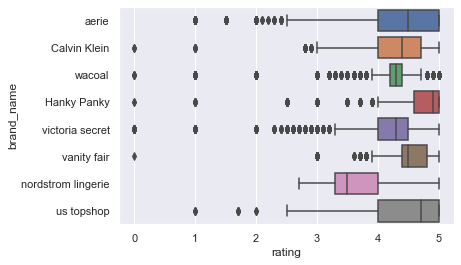

In [99]:
#Checking the distribution by brand
sns.boxplot(data=df, y='brand_name',x='rating')

<AxesSubplot:>

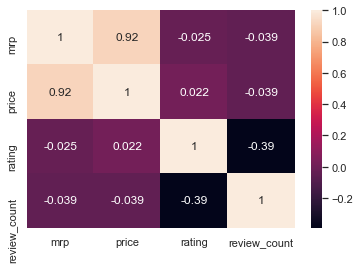

In [133]:
#Just curious to see if rating has a linear relationship with some other variables.
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)

In [ ]:
#Apparently, not at all.

In [142]:
#Finally, we could simply take the median as an overall rating of the brand based on the rating of the products.
groupedbrands.rating.median().sort_values()

brand_name
nordstrom lingerie    3.5
victoria secret       4.3
wacoal                4.3
Calvin Klein          4.4
aerie                 4.5
vanity fair           4.5
us topshop            4.7
Hanky Panky           4.9
Name: rating, dtype: float64

In [148]:
#Savinf the rate into a df
rating_score = pd.DataFrame(groupedbrands.rating.median().sort_values())
rating_score

,rating
brand_name,
nordstrom lingerie,3.5
victoria secret,4.3
wacoal,4.3
Calvin Klein,4.4
aerie,4.5
vanity fair,4.5
us topshop,4.7
Hanky Panky,4.9


**12.b) According to your definition, which brands have the best ratings?**

In [ ]:
#According to the median, Hanky Panky have the highest rating, followed by us topshop.

**12.c) Which types of products sold by all brands? And which product of these categories are sold by all brands?**

<AxesSubplot:xlabel='brand', ylabel='product_category'>

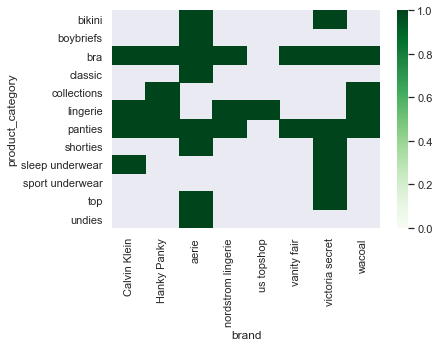

In [159]:
sns.heatmap(data=cat_pivot ,cmap='Greens',vmin=0,vmax=1)

In [ ]:
#Us topshop sell only "lingerie" category. This is probably due to a bad category cleaning from me.
#Maybe US Topshop use a different lexic to describe its products.
#But bra & panties are the categories that are sold by almost each retailer.

In [173]:
#contains bra
prod_bra = pd.DataFrame(df.loc[df.product_category == 'bra'][['product_name','brand_name']].value_counts())
prod_bra = prod_bra.reset_index()
prod_bra.columns = ['product', 'brand','count']
prod_bra

,product,brand,count
0,Body by Victoria Perfect Coverage Bra,victoria secret,17922
1,Victoria Sport Incredible by Victoria Sport Bra,victoria secret,12274
2,Dream Angels Push-Up Bra,victoria secret,11878
3,Very Sexy Push-Up Bra,victoria secret,10985
4,Body by Victoria Demi Bra,victoria secret,10881
...,...,...,...
939,retro calvin short,Calvin Klein,1
940,seamless bikini,Calvin Klein,1
941,40th Anniversary Hanky Cami,Hanky Panky,1
942,hashtag triangle bralette,Calvin Klein,1


<AxesSubplot:xlabel='brand', ylabel='product'>

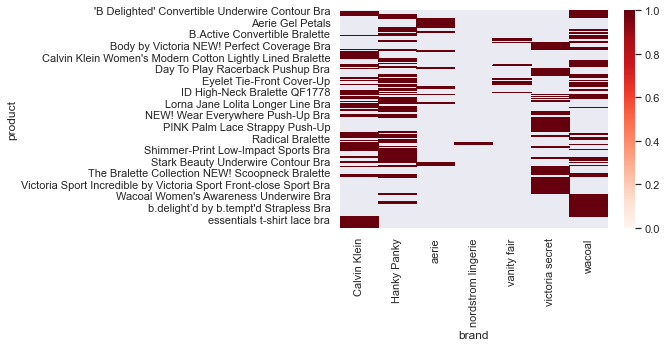

In [179]:
prod_bra_pivot = prod_bra.pivot('product','brand','count')
sns.heatmap(data=prod_bra_pivot ,cmap='Reds',vmin=0,vmax=1)

In [238]:
top_products = prod_bra['product'].value_counts()

In [239]:
largest_product = prod_bra[prod_bra['product'].isin(top_products.nlargest(3).index)]

In [241]:
largest_product.sort_values(by='product')

,product,brand,count
443,Bralette,wacoal,44
471,Bralette,Calvin Klein,40
698,Convertible Underwire Push-Up Bra,Calvin Klein,18
810,Convertible Underwire Push-Up Bra,wacoal,11
379,Triangle Bralette,Calvin Klein,57
585,Triangle Bralette,wacoal,26
830,Triangle Bralette,Hanky Panky,10


In [ ]:
# I didn't find any products that is sold by all brands.
# But we have a bralette that is sold by Calvin Klein, Wacoal and Hanky panky.